Q1.Explain the basic concept of clustering and give examples of applications where clustering is useful. 

Clustering is a fundamental technique in unsupervised machine learning that involves grouping similar data points together based on their features or characteristics. The goal of clustering is to discover hidden patterns, structures, or natural groupings within a dataset without any prior knowledge of the class labels. Each group of similar data points is called a cluster, and the data points within a cluster are more similar to each other than to those in other clusters.

Here's a basic concept of clustering:

1. Data Points: You start with a dataset consisting of a collection of data points. Each data point is represented by a set of features or attributes.

2. Similarity Measure: You define a similarity or distance measure to quantify how similar or dissimilar two data points are. Common distance measures include Euclidean distance, cosine similarity, and more.

3. Clustering Algorithm: You apply a clustering algorithm to the dataset. There are several clustering algorithms available, such as K-Means, Hierarchical Clustering, and DBSCAN, among others. The algorithm's goal is to group the data points into clusters based on their similarity.

4. Cluster Assignment: After clustering, each data point is assigned to one of the clusters based on its similarity to the cluster's centroid (in the case of K-Means) or its hierarchical structure (in the case of Hierarchical Clustering).

5. Analysis and Interpretation: Once the clustering is complete, you can analyze the resulting clusters to gain insights, discover patterns, or make decisions based on the grouping of data points.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


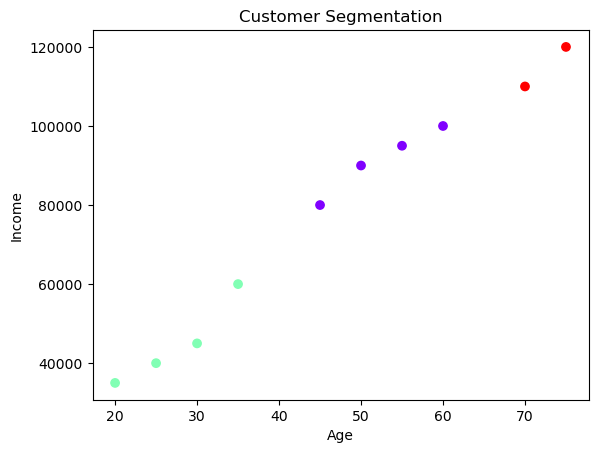

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample customer data
data = pd.DataFrame({
    'Age': [25, 30, 35, 20, 45, 50, 55, 60, 70, 75],
    'Income': [40000, 45000, 60000, 35000, 80000, 90000, 95000, 100000, 110000, 120000]
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Plot the clustered data
plt.scatter(data['Age'], data['Income'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation')
plt.show()


2. What is DBSCAN and how does it differ from other clustering algorithms such as k-means and
hierarchical clustering?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm used to partition a dataset into clusters of varying shapes and sizes. DBSCAN is different from other clustering algorithms like K-Means and Hierarchical Clustering in several ways:

1.Cluster Shape and Size:

a. K-Means: K-Means assumes that clusters are spherical, isotropic, and of roughly equal size. It assigns each data point to the nearest centroid, which may lead to circular clusters.

b.Hierarchical Clustering: Hierarchical Clustering builds a hierarchy of clusters using bottom-up or top-down approaches. The shapes and sizes of clusters can vary, but it often produces binary tree-like structures.

c. DBSCAN: DBSCAN can find clusters of arbitrary shapes and sizes. It identifies clusters as regions of high data point density, allowing it to discover clusters with irregular shapes and varying sizes.

2. Number of Clusters:

a.K-Means: You need to specify the number of clusters (K) in advance, which can be a limitation when the actual number of clusters is unknown.

b.Hierarchical Clustering: You can choose the number of clusters at different levels of the hierarchy, but you still need to decide how many clusters to use.

c. DBSCAN: DBSCAN does not require you to specify the number of clusters beforehand. It automatically finds the clusters based on density.

3. Handling Noise:

a. K-Means: K-Means does not handle noisy data points well. Outliers can significantly affect the centroids' positions.

b.Hierarchical Clustering: Hierarchical clustering can be sensitive to outliers, and it might create singleton clusters for noise.

b. DBSCAN: DBSCAN is robust to noise because it classifies data points that do not belong to any cluster as noise or outliers.

4.Cluster Density:

a. K-Means: K-Means assumes that clusters have roughly similar densities, which may not be the case in all datasets.

b. Hierarchical Clustering: Similar to K-Means, it doesn't explicitly model varying cluster densities.

c.DBSCAN: DBSCAN identifies clusters as regions of high data point density and can handle clusters with varying densities effectively.


Q4. How does DBSCAN clustering handle outliers in a dataset?

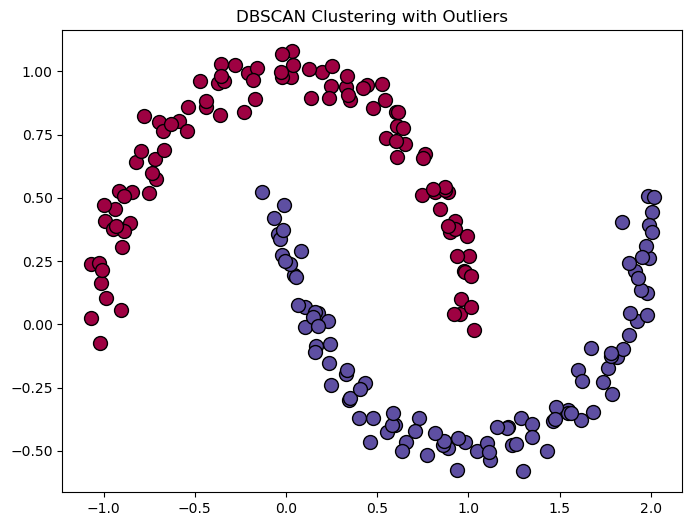

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate a sample dataset with two moon-shaped clusters and some outliers
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

plt.title('DBSCAN Clustering with Outliers')
plt.show()

Q5. How does DBSCAN clustering differ from k-means clustering?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and K-Means clustering are two fundamentally different clustering algorithms that have distinct approaches to grouping data points into clusters. Here are the key differences between DBSCAN and K-Means clustering:

1. Cluster Shape and Size:

K-Means: K-Means assumes that clusters are spherical, isotropic, and of roughly equal size. It tries to find cluster centers that minimize the sum of squared distances of data points to their nearest center. As a result, it tends to produce circular or spherical clusters.

DBSCAN: DBSCAN can discover clusters of arbitrary shapes and sizes. It identifies clusters as regions of high data point density and does not make assumptions about the shapes of the clusters.

2. Number of Clusters:

K-Means: In K-Means, you need to specify the number of clusters (K) in advance. This can be a limitation when the true number of clusters is unknown.

DBSCAN: DBSCAN does not require you to specify the number of clusters beforehand. It automatically finds clusters based on density and does not assume a fixed number of clusters.

3. Handling Noise:

K-Means: K-Means is sensitive to outliers, and noisy data points can significantly affect the position of cluster centroids.

DBSCAN: DBSCAN is designed to handle outliers naturally. It classifies data points that do not belong to any cluster as noise or outliers.

4. Initialization and Convergence:

K-Means: K-Means initialization can impact results, as it can converge to different local minima depending on the initial centroids. It may require multiple runs with different initializations.

DBSCAN: DBSCAN does not require iterative optimization and initialization like K-Means. It finds clusters in a single pass through the data.

5.Density vs. Centroid-Based:

K-Means: K-Means is a centroid-based method. It calculates cluster centroids and assigns data points to the nearest centroid.

DBSCAN: DBSCAN is a density-based method. It identifies clusters based on the density of data points, grouping points that are close together and have sufficient local density.

Q7.How does DBSCAN clustering handle clusters with varying densities?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is particularly effective at handling clusters with varying densities. It is designed to identify clusters based on the density of data points in the feature space rather than assuming that clusters have a particular shape or density. Here's how DBSCAN handles clusters with varying densities:

1. Core Points: DBSCAN defines two important parameters: "epsilon" (ε), which represents the maximum distance between two data points for one to be considered a neighbor of the other, and "minPts," which represents the minimum number of data points required to form a dense region or cluster.

2. Density-Based Clustering: DBSCAN categorizes data points into three main types: core points, border points, and noise points (outliers).

Core Points: A data point is considered a core point if there are at least "minPts" data points, including itself, within a distance of ε. Core points are the central points of clusters.

Border Points: A data point is considered a border point if it is within ε distance of a core point but does not have enough neighbors to be a core point itself. Border points are on the edges of clusters.

Noise Points: Data points that are neither core points nor border points are classified as noise points (outliers).

3. Cluster Formation: DBSCAN starts with an arbitrary data point and explores its neighborhood using ε and minPts parameters. It recursively expands the cluster by adding core points and their neighbors to the cluster until no more core points can be added.

4. Varying Densities: DBSCAN can naturally handle clusters with varying densities because it doesn't rely on a fixed shape or size for clusters. It adapts to the local density of data points. In areas with high data density, the algorithm will identify core points and form dense clusters, while in areas with lower density, it will create smaller or sparser clusters. This makes DBSCAN suitable for clusters with irregular shapes and varying densities.

5. Robust to Noise: DBSCAN is also robust to noise because it identifies noise points as outliers that do not belong to any cluster. This helps in handling data with anomalies or sparse regions effectively.

Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?

Evaluating the quality of DBSCAN clustering results is important to assess how well the algorithm has performed in grouping data points into clusters. Several common evaluation metrics are used for this purpose:

1. Silhouette Score: The silhouette score measures how similar each data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A higher average silhouette score across all data points suggests better clustering.

2. Davies-Bouldin Index: This index measures the average similarity between each cluster and its most similar cluster. A lower Davies-Bouldin index value indicates better clustering, with smaller values indicating more distinct and well-separated clusters.

3. Dunn Index: The Dunn index evaluates the ratio between the minimum inter-cluster distance and the maximum intra-cluster distance. A higher Dunn index suggests better clustering, as it indicates that clusters are well separated and tightly packed.

4. Adjusted Rand Index (ARI): ARI measures the similarity between the true labels of data points and the labels assigned by the clustering algorithm, while adjusting for chance. It ranges from -1 to 1, where a higher value indicates better clustering. An ARI of 0 suggests that clustering results are no better than random, and negative values indicate worse than random.

5. Completeness and Homogeneity: These two metrics are often used together to evaluate clustering quality. Completeness measures whether all data points that are members of the same true class are assigned to the same cluster. Homogeneity measures whether all data points in the same cluster belong to the same true class. Higher completeness and homogeneity values indicate better clustering.

6. Fowlkes-Mallows Index (FMI): FMI calculates the geometric mean of precision and recall, which measures the similarity between the true labels and the clustering results. It ranges from 0 to 1, where a higher value indicates better clustering.

7. Calinski-Harabasz Index: This index calculates the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz index indicates better clustering, with larger values suggesting more compact and well-separated clusters.

8. V-Measure: The V-Measure is a combination of homogeneity and completeness, which measures the balance between these two aspects of clustering quality. It ranges from 0 to 1, with higher values indicating better clustering.

9. Rand Index: The Rand index measures the similarity between the true labels and the clustering results, including both true positives and true negatives. It ranges from 0 to 1, where a higher value indicates better clustering.


Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is primarily an unsupervised clustering algorithm designed to identify clusters in unlabeled data based on the density of data points in feature space. However, it can be used in a semi-supervised learning setting when combined with other techniques or when you have access to some labeled data. Here are a few ways DBSCAN can be used in semi-
supervised learning tasks:

1. Seed-Based Label Propagation: You can use DBSCAN to identify clusters in your unlabeled data and then manually label a few representative data points within each cluster. These labeled points can serve as seeds for a label propagation algorithm, such as semi-supervised learning methods like Label Propagation or Label Spreading. These methods can then propagate labels to the rest of the points in the cluster, effectively providing semi-supervised classification.

2. Outlier Detection: DBSCAN can be used as an outlier detection method to find anomalous data points in your dataset. In a semi-supervised setting, you can label these detected outliers as "anomalies" or "outliers." This can be particularly useful in tasks where identifying rare events or anomalies is crucial.

3. Feature Engineering: Clusters identified by DBSCAN can be used to derive new features for your dataset. These features can be used alongside labeled data to train a supervised learning model. For example, you can create binary features indicating whether a data point belongs to a specific cluster or not, or you can calculate statistics within each cluster (e.g., mean, variance) and use them as features.

4. Active Learning: In active learning scenarios, you can use DBSCAN to identify data points that are uncertain or on the boundary of clusters. These points can be selected for manual labeling, allowing you to iteratively improve the performance of your semi-supervised model by focusing on the most informative examples.

5. Semi-supervised Clustering: There are variations of DBSCAN, such as Semi-Supervised DBSCAN, that incorporate labeled information into the clustering process. These methods aim to leverage both the density-based clustering nature of DBSCAN and the provided labels to improve cluster formation.



Q10. How does DBSCAN clustering handle datasets with noise or missing values?


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is robust to noise in datasets, but it doesn't directly handle missing values. Here's how DBSCAN handles datasets with noise and how you can address missing values when using DBSCAN:

Handling Noise:

Noise Points: DBSCAN explicitly identifies and handles noise points or outliers in the dataset. Noise points are data points that do not belong to any cluster. The algorithm identifies them as data points that do not meet the criteria for core points or border points, typically because they have too few nearby neighbors within the specified distance (epsilon, ε). These noise points are an inherent part of the clustering result and are labeled as such.

Robustness to Noise: One of the advantages of DBSCAN is its robustness to noise. It doesn't force every data point into a cluster, making it suitable for datasets with outliers or noisy data. Noise points do not affect the formation of clusters, and they are typically assigned a special label (e.g., -1) to indicate that they are not part of any cluster.

Handling Missing Values:

DBSCAN and Missing Values: DBSCAN does not have built-in mechanisms for handling missing values. It expects a fully populated dataset with numerical values for each feature. If your dataset has missing values, you must address them before applying DBSCAN.

Data Imputation: You should perform data imputation to fill in missing values in your dataset. Various imputation techniques, such as mean imputation, median imputation, or more advanced methods like k-nearest neighbors (KNN) imputation, can be used to estimate missing values. After imputation, your dataset will be complete and suitable for DBSCAN.

Imputation Impact: Be aware that the choice of imputation method can impact the clustering results. The imputed values can influence the distances between data points, which in turn can affect the clustering outcome. Therefore, it's important to carefully consider the imputation method that best suits your data and the goals of your analysis.

Q11. Implement the DBSCAN algorithm using a python programming language, and apply it to a sample
dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.5  
min_samples = 5  
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Get cluster labels (-1 indicates noise points)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise (-1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Print the results
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

# Plot the clustering results (only for the first two features)
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points
    
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=10)

plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
